<a href="https://colab.research.google.com/github/daniribeirof/UB_DS-ML_Capstone-project_Bicing-predictions/blob/main/02_Visualization_partI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Required libraries:

In [ ]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib.dates import MonthLocator
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12)
plt.rc('figure', figsize = (12, 5))

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load processed Data Frames:**
All data processement can be check on file:

[01_DF_creation_Station&Bicing_info](https://colab.research.google.com/drive/1L4QHje5e7tBrphzDqBJ0FZrVmALJmC0g?usp=sharing)


## DF Bicing: 2019-2022

In [ ]:
df = pd.read_csv('/content/drive/My Drive/CapstoneProject_NathyDani/df_final.csv')

In [ ]:
df.shape

(2967415, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2967415 entries, 0 to 2967414
Data columns (total 18 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   station_id                  int64  
 1   lat                         float64
 2   lon                         float64
 3   altitude                    float64
 4   address                     object 
 5   post_code                   int64  
 6   capacity                    int64  
 7   date                        object 
 8   year                        int64  
 9   month                       int64  
 10  day                         int64  
 11  day_of_week                 int64  
 12  hour                        int64  
 13  percentage_docks_available  float64
 14  ctx-4                       float64
 15  ctx-3                       float64
 16  ctx-2                       float64
 17  ctx-1                       float64
dtypes: float64(8), int64(8), object(2)
memory usage: 407.5+ MB


In [ ]:
df.head()

,station_id,lat,lon,altitude,address,post_code,capacity,date,year,month,day,day_of_week,hour,percentage_docks_available,ctx-4,ctx-3,ctx-2,ctx-1
0,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-01,2022,1,1,5,4,0.72,0.68,0.73,0.74,0.72
1,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-01,2022,1,1,5,9,0.58,0.67,0.63,0.62,0.61
2,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-01,2022,1,1,5,14,0.75,0.62,0.67,0.74,0.75
3,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-01,2022,1,1,5,19,0.65,0.76,0.72,0.69,0.68
4,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-02,2022,1,2,6,0,0.59,0.66,0.68,0.66,0.59


## DF stations:

In [ ]:
df_stations = pd.read_csv('/content/drive/My Drive/CapstoneProject_NathyDani/df_stations.csv')

In [ ]:
df_stations.shape

(509, 7)

In [ ]:
df_stations.head()

,station_id,lat,lon,altitude,address,post_code,capacity
0,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46
1,2,41.395488,2.177198,17.0,"C/ ROGER DE FLOR, 126",8013,29
2,3,41.394156,2.181331,11.0,"C/ NÀPOLS, 82",8013,27
3,4,41.393317,2.181248,8.0,"C/ RIBES, 13",8013,21
4,5,41.391103,2.180176,7.0,"PG. LLUIS COMPANYS, 11 (ARC TRIOMF)",8018,39


# Exploring the data:
We will make some graphs to better understand the data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2967415 entries, 0 to 2967414
Data columns (total 18 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   station_id                  int64  
 1   lat                         float64
 2   lon                         float64
 3   altitude                    float64
 4   address                     object 
 5   post_code                   int64  
 6   capacity                    int64  
 7   date                        object 
 8   year                        int64  
 9   month                       int64  
 10  day                         int64  
 11  day_of_week                 int64  
 12  hour                        int64  
 13  percentage_docks_available  float64
 14  ctx-4                       float64
 15  ctx-3                       float64
 16  ctx-2                       float64
 17  ctx-1                       float64
dtypes: float64(8), int64(8), object(2)
memory usage: 407.5+ MB


In [ ]:
df.describe()

,station_id,lat,lon,altitude,post_code,capacity,year,month,day,day_of_week,hour,percentage_docks_available,ctx-4,ctx-3,ctx-2,ctx-1
count,2.967415e+06,2.967415e+06,2.967415e+06,2.967415e+06,2.967415e+06,2.967415e+06,2.967415e+06,2.967415e+06,2.967415e+06,2.967415e+06,2.967415e+06,2.967415e+06,2.967415e+06,2.967415e+06,2.967415e+06,2.967415e+06
mean,2.503735e+02,4.139903e+01,2.168506e+00,3.384977e+01,8.021332e+03,2.698647e+01,2.020713e+03,6.912915e+00,1.573943e+01,2.997607e+00,1.149904e+01,5.769208e-01,5.769439e-01,5.768797e-01,5.768447e-01,5.768391e-01
std,1.447218e+02,2.053194e-02,2.451059e-02,3.106028e+01,4.337424e+01,6.438181e+00,1.069424e+00,3.353130e+00,8.793153e+00,1.999585e+00,6.909692e+00,2.858502e-01,2.858020e-01,2.858281e-01,2.858080e-01,2.857830e-01
min,1.000000e+00,4.134677e+01,2.109154e+00,2.000000e+00,8.001000e+03,1.200000e+01,2.019000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.260000e+02,4.138358e+01,2.149910e+00,8.000000e+00,8.010000e+03,2.400000e+01,2.020000e+03,4.000000e+00,8.000000e+00,1.000000e+00,6.000000e+00,3.600000e-01,3.600000e-01,3.600000e-01,3.600000e-01,3.600000e-01
50%,2.500000e+02,4.139540e+01,2.170939e+00,2.400000e+01,8.018000e+03,2.700000e+01,2.021000e+03,7.000000e+00,1.600000e+01,3.000000e+00,1.200000e+01,6.200000e-01,6.200000e-01,6.200000e-01,6.200000e-01,6.200000e-01
75%,3.700000e+02,4.141108e+01,2.187440e+00,4.800000e+01,8.029000e+03,3.000000e+01,2.022000e+03,1.000000e+01,2.300000e+01,5.000000e+00,1.700000e+01,8.200000e-01,8.200000e-01,8.200000e-01,8.200000e-01,8.200000e-01
max,5.190000e+02,4.146209e+01,2.220691e+00,1.660000e+02,8.930000e+03,5.400000e+01,2.022000e+03,1.200000e+01,3.100000e+01,6.000000e+00,2.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## Some data visualization:

In [ ]:
#change column type to category
category_columns = ['year', 'month', 'day_of_week', 'hour']
for col in category_columns:
    df[col] = df[col].astype('category')

### Station capacity:

### Timestamp:

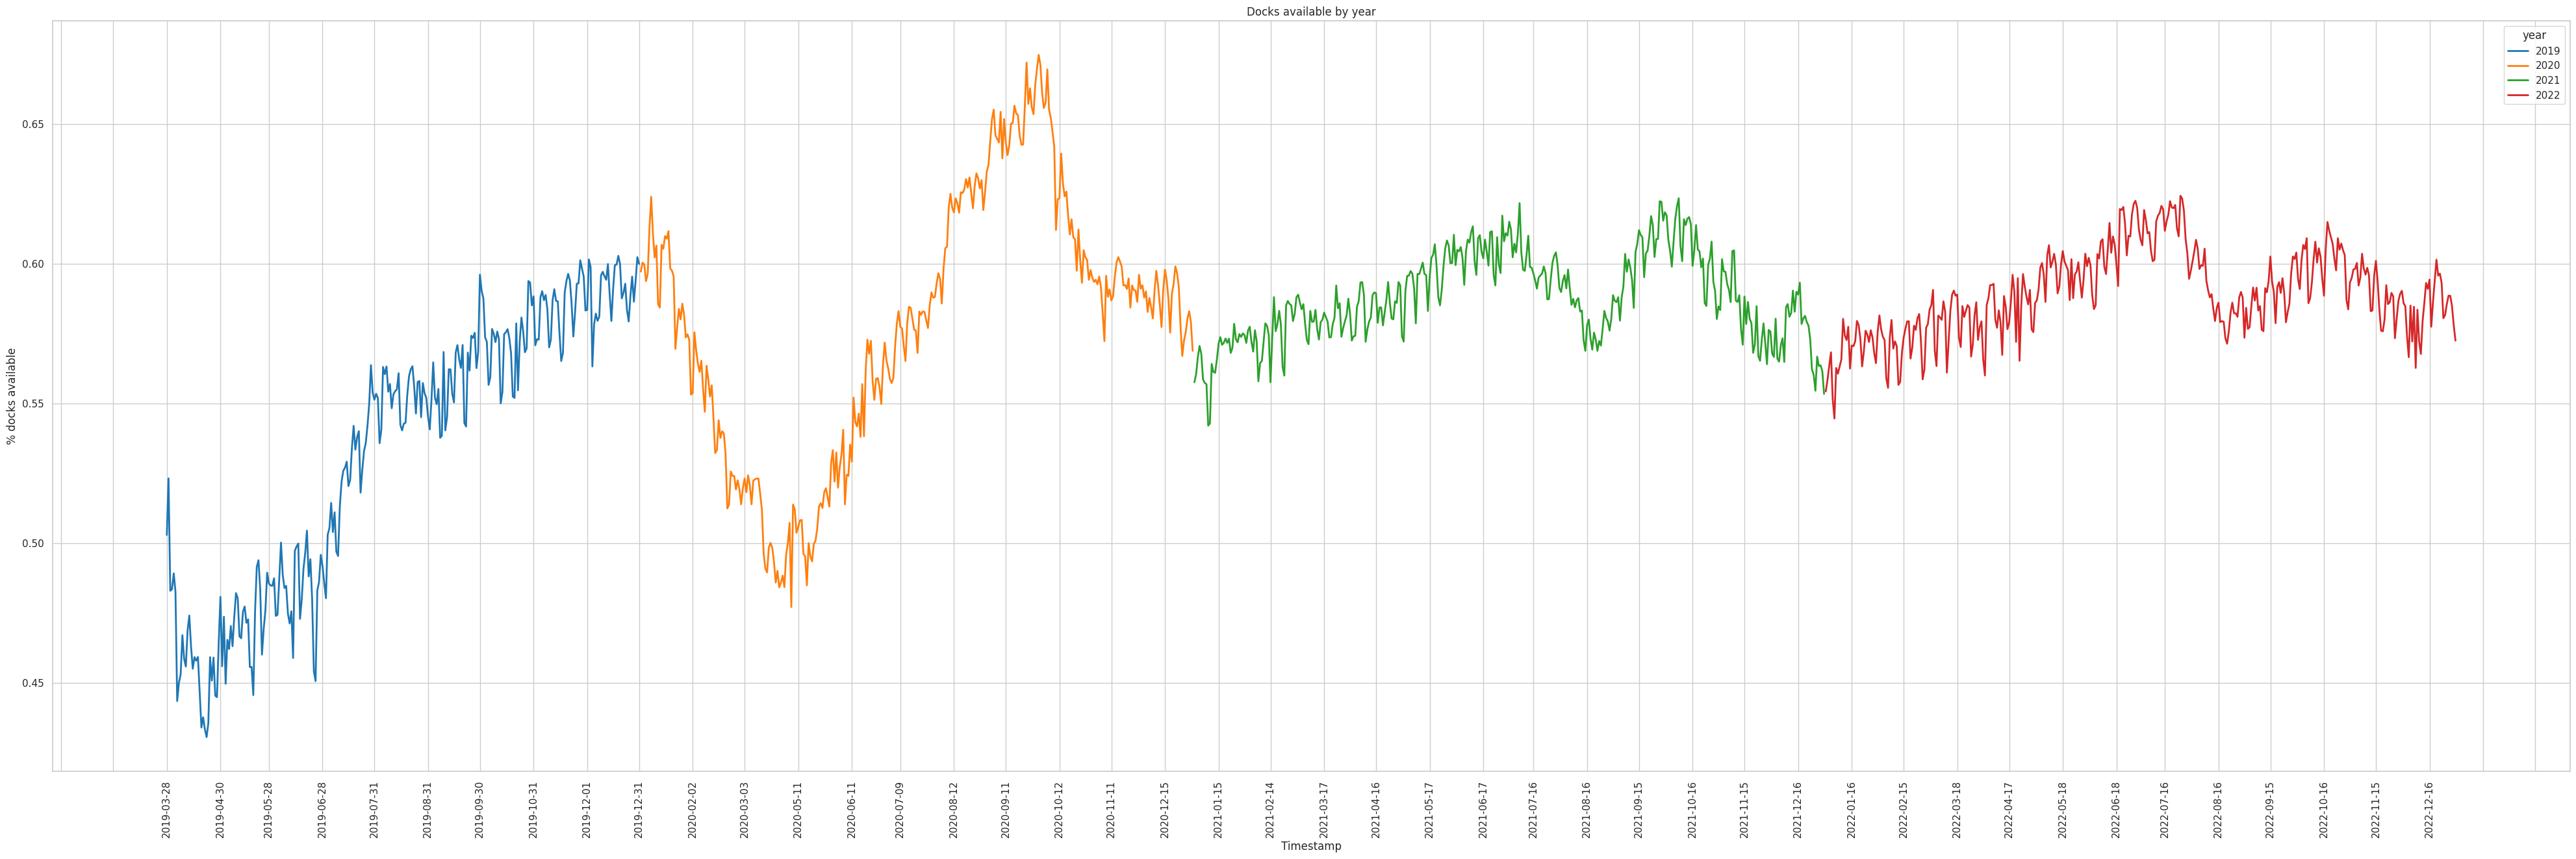

In [ ]:
plt.figure(figsize = (50, 15))

ax = sns.lineplot(data=df.sort_values('date'), x='date', y='percentage_docks_available', hue='year', errorbar=None)

ax.xaxis.set_major_locator(MonthLocator())
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)

ax.set_xlabel('Timestamp')
ax.set_ylabel('% docks available')
ax.set_title('Docks available by year')

plt.show()

### Percentage of docks available by month:

In [ ]:
dic_month = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',
             5:'May',6:'Jun',7:'Jul',8:'Aug',
             9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

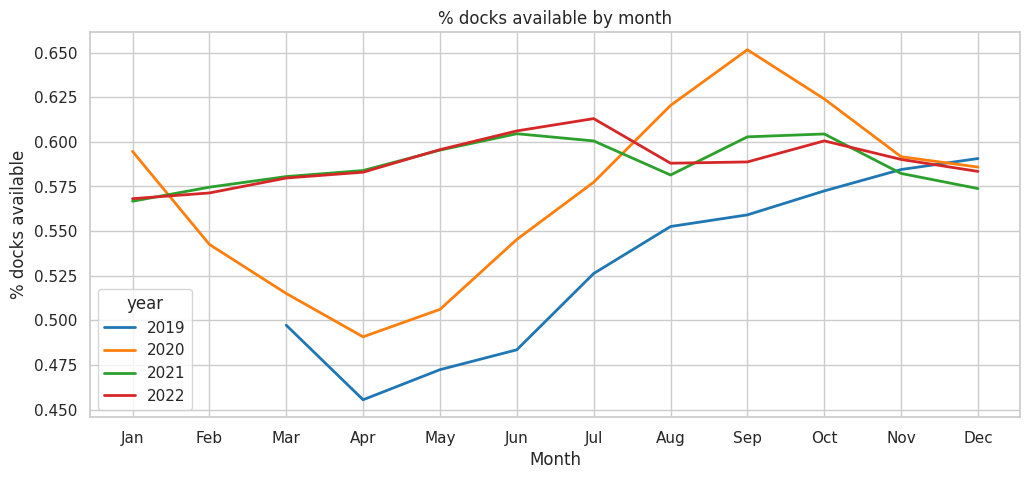

<Figure size 1200x500 with 0 Axes>

In [ ]:
ax = sns.lineplot(data=df, x='month', y='percentage_docks_available', hue='year', errorbar=None)

ax.set_xlabel('Month')
ax.set_ylabel('% docks available')
ax.set_title('% docks available by month')

ax.set_xticks(list(dic_month.keys()))
ax.set_xticklabels(list(dic_month.values()))

plt.show()

plt.savefig('/content/drive/My Drive/CapstoneProject_NathyDani/graph-docks-by-month.png')

### Percentage of docks available by hour:

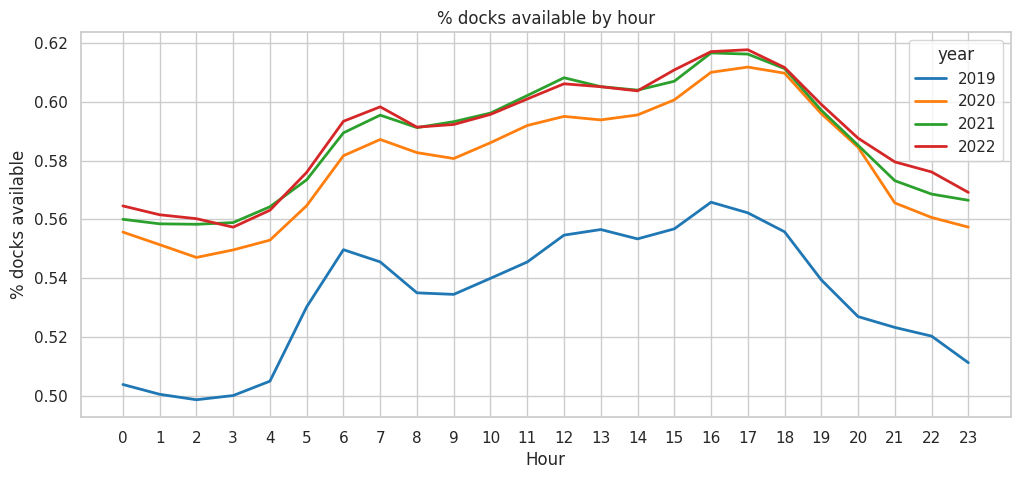

<Figure size 1200x500 with 0 Axes>

In [ ]:
ax = sns.lineplot(data=df, x='hour', y='percentage_docks_available', hue='year', errorbar=None)

ax.set_xlabel('Hour')
ax.set_ylabel('% docks available')
ax.set_title('% docks available by hour')

ax.set_xticks(df['hour'].unique())
ax.set_xticklabels(df['hour'].unique())

plt.show()

plt.savefig('/content/drive/My Drive/CapstoneProject_NathyDani/graph-docks-by-hour.png')

### Percentage of docks available by day of the week:

In [ ]:
dic_day_of_week = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',
                   5:'Saturday',6:'Sunday'}

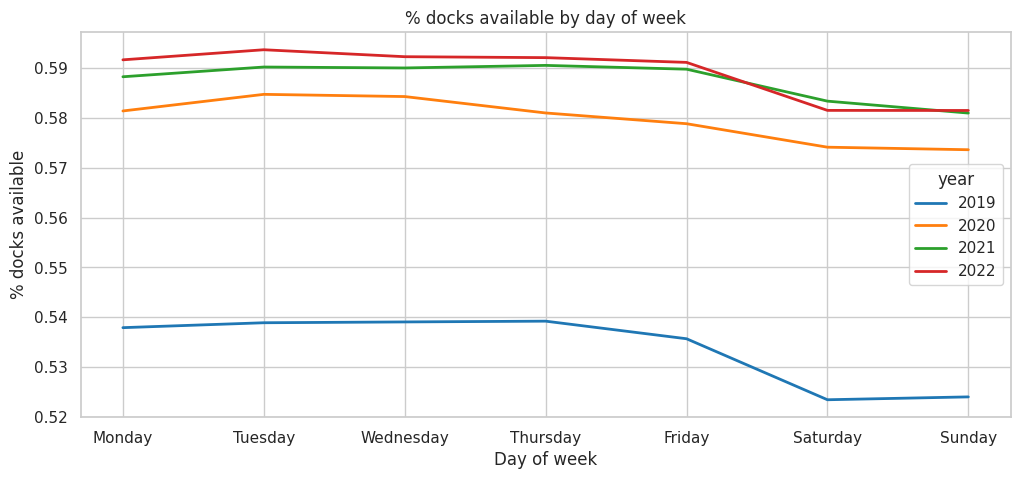

<Figure size 1200x500 with 0 Axes>

In [ ]:
ax = sns.lineplot(data=df, x='day_of_week', y='percentage_docks_available', hue='year', errorbar=None)

ax.set_xlabel('Day of week')
ax.set_ylabel('% docks available')
ax.set_title('% docks available by day of week')

ax.set_xticks(list(dic_day_of_week.keys()))
ax.set_xticklabels(list(dic_day_of_week.values()))

plt.show()

plt.savefig('/content/drive/My Drive/CapstoneProject_NathyDani/graph-docks-by-week.png')

### Percentage of docks available by day of the week and hour:

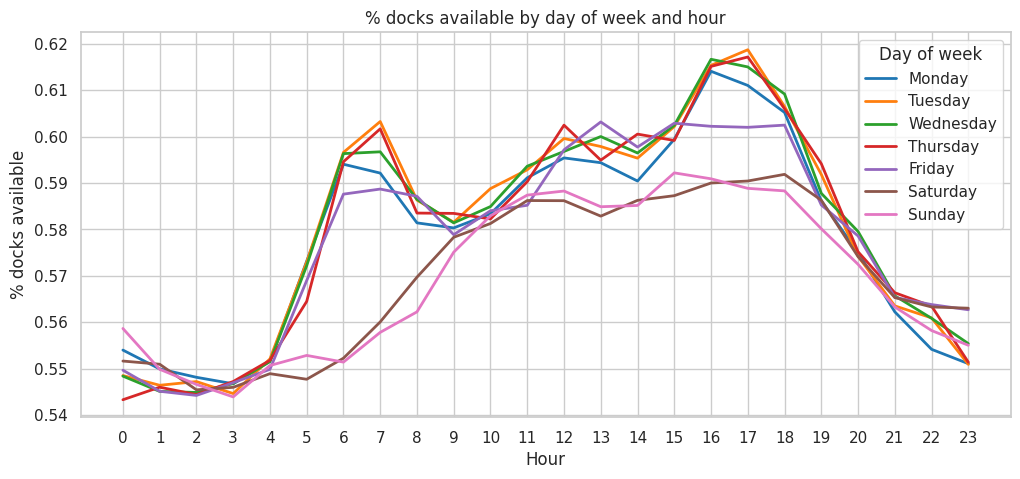

<Figure size 1200x500 with 0 Axes>

In [ ]:
ax = sns.lineplot(data=df, x='hour', y='percentage_docks_available', hue='day_of_week', errorbar=None)

ax.set_xlabel('Hour')
ax.set_ylabel('% docks available')
ax.set_title('% docks available by day of week and hour')

ax.set_xticks(df['hour'].unique())
ax.set_xticklabels(df['hour'].unique())

plt.legend(title='Day of week', labels=dic_day_of_week.values())

plt.show()

plt.savefig('/content/drive/My Drive/CapstoneProject_NathyDani/graph-docks-by-week-and-hour.png')

### Percentage of docks available at different times of the day:

#### By month:

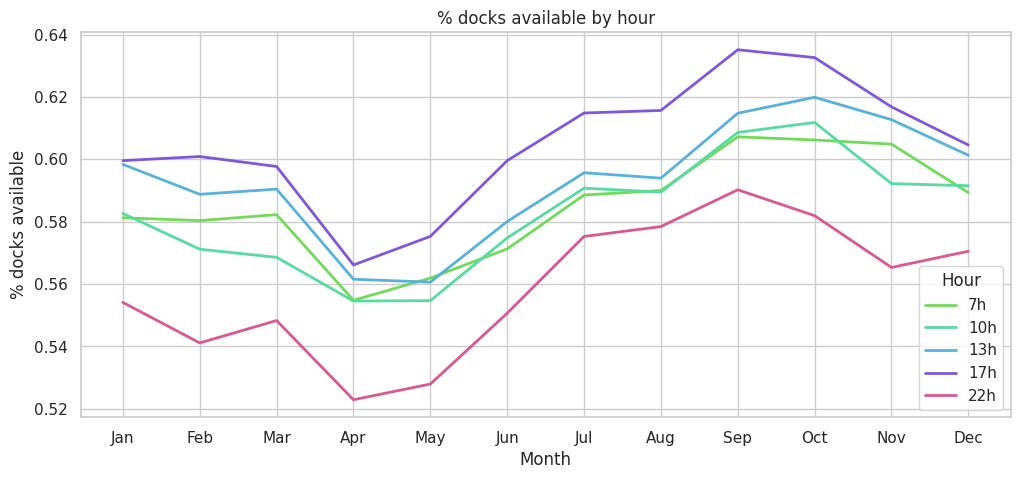

<Figure size 1200x500 with 0 Axes>

In [ ]:
hours = [7, 10, 13, 17, 22]

ax = sns.lineplot(data=df[df['hour'].isin(hours)], x='month', y='percentage_docks_available', hue='hour', errorbar=None, palette='hls')

ax.set_xlabel('Month')
ax.set_ylabel('% docks available')
ax.set_title('% docks available by hour')

ax.set_xticks(list(dic_month.keys()))
ax.set_xticklabels(list(dic_month.values()))

plt.legend(title='Hour', labels=['7h', '10h', '13h', '17h', '22h'])

plt.show()

plt.savefig('/content/drive/My Drive/CapstoneProject_NathyDani/graph-docks-selected-hours-month.png')

#### By day of the week:

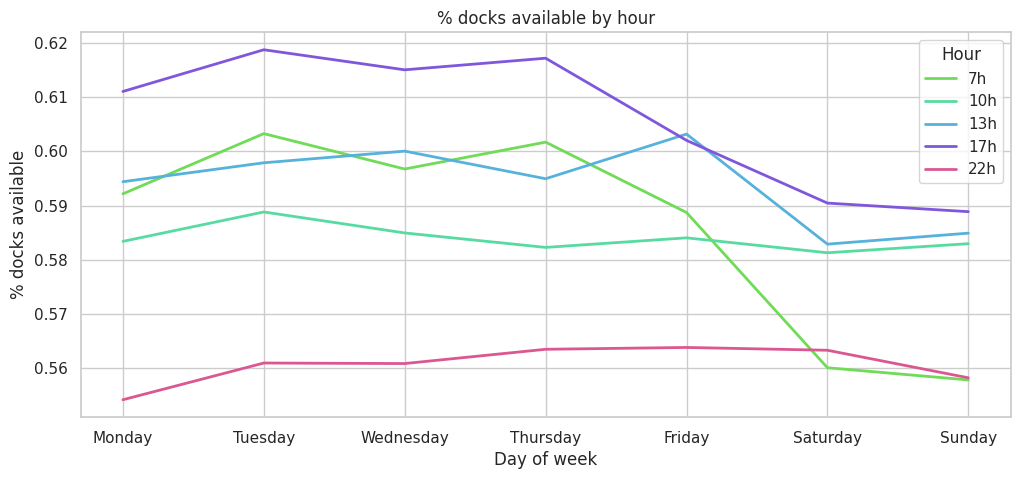

<Figure size 1200x500 with 0 Axes>

In [ ]:
ax = sns.lineplot(data=df[df['hour'].isin(hours)], x='day_of_week', y='percentage_docks_available', hue='hour', errorbar=None, palette='hls')

ax.set_xlabel('Day of week')
ax.set_ylabel('% docks available')
ax.set_title('% docks available by hour')

ax.set_xticks(list(dic_day_of_week.keys()))
ax.set_xticklabels(list(dic_day_of_week.values()))

plt.legend(title='Hour', labels=['7h', '10h', '13h', '17h', '22h'])

plt.show()

plt.savefig('/content/drive/My Drive/CapstoneProject_NathyDani/graph-docks-selected-hours-week.png')